# Assignment 1:
## Image recognition using deep networks

In [35]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [36]:
keras.__version__

'2.4.0'

###Question 1:
Discuss with your group, then describe to your teacher, a list of applications where automatic recognition of hand-written numbers would be useful.

Answer 1: transforming handwritten notes into a document. Signature detection to see if it was the actual person.

In [37]:
# dataset of 60k grayscale images of handwritten numbers (x_train) and 
# labels of each picture (y_train)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [38]:
print(x_train.shape)

(60000, 28, 28)


Before using a deep convolutional network, we will test a multilayer perceptron. This is a type of artificial neural network where all nodes in each layer are connected to all nodes in the next layer.

## Data Preparation

flattening the two spatial dimensions to convert from a 60000x28x28 training set to a 60000x784 training set

In [39]:
# from pixels 28x28 to columns of 784 pixels for each row and saved as new variable
# 60000 images & 10000 labels
x_train= x_train.reshape((60000,784))
x_test=x_test.reshape((10000,784))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [40]:
# rescale to values between zero and one by dividing by 255
x_train = x_train/255
x_test = x_test/255

In [41]:
# convert train and testset labels to two new variables y_train and y_test 
# so that all labels 1-10 are separate network units in the output layer
# each label then has 10 elements (9 are zeros & 1 is 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[1])
print(y_test[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Model definition

In [42]:
# pass 784 input units into 256-unit fully connected hidden layer
# input shape put into 256 nodes
# feeds into output layer (label) which is activated with softmax function

model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,))) #256 number of nodes that are fully connected
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# then compile model with loss functions (categorial crossentropy)
# & optimisation procedures (RMSprop=  moving average of the square of gradients
# and Divide the gradient by the root of this average )
# & performance measure (accuracy)

model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

# fit the model to training set
# 12 training epochs (how many times)
# batch size = 128 image lable pairs per epoch 
history = model.fit(x_train, y_train, batch_size=128,
epochs=12, verbose=1, validation_split=0.2) #always the same split so this doesn't change over epochs

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8850 - val_loss: 0.2997 - val_accuracy: 0.9157
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.9133 - val_loss: 0.2790 - val_accuracy: 0.9219
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.9186 - val_loss: 0.2768 - val_accuracy: 0.9243
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2873 - a

###Question 2: 
Show your teacher the text from your console, with how long it took for each epoch to run and the training performance history 

Answer: See above

Question 3: Plot the training history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


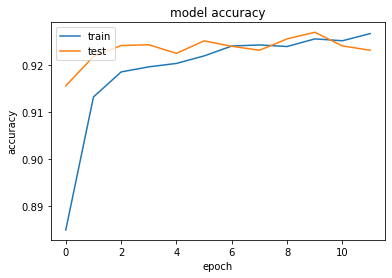

In [43]:
# Answer Question 3
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

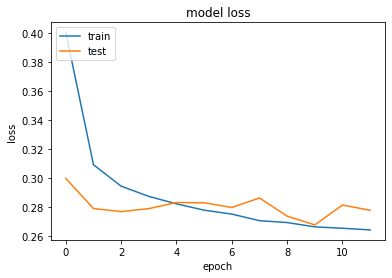

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Question 4:
Discuss with your group, then describe to your teacher, how the accuracy on the training and validation sets progress differently across epochs, and what this tells us about the generalisation of the model. 

Answer 4: The accuracy gets better over time for both the validation and the training set. However, one oculd also see that the accuracy of the validation set was higher than the training set for the first few (five) epochs in this run which would be a sign of underfitting. By the end of the 12 epochs the model showed an accuracy of loss: 0.2633 - accuracy: 0.9260 - val_loss: 0.2852 - val_accuracy: 0.9259 which is still not great. 

HERE referring to the generalization WITHIN the same data so just between test and training set.

###Question 5:
Evaluate the model performance on the test set using the following command: 
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
Show your teacher what values you get for the model’s accuracy and loss. 

In [45]:
#Answer Question 5
accuracy, loss = model.evaluate(x_test, y_test, verbose=0)
print("loss of Model 1", accuracy)
print("accuracy of Model 1", loss)

loss of Model 1 0.2851683497428894
accuracy of Model 1 0.9205999970436096


###Question 6:
Discuss with your group, then describe to your teacher, whether this accuracy is sufficient for some uses of automatic hand-written digit classification.

Answer 6: It's not sufficient as this is a simple task that should be more accurate. If we used this model in a bank or a more serious task 8% are a big issue. 

###Question 7:
In the previous model, we did not specify an activation function for our hidden layer, so it used the default linear activation. Discuss with your group, then describe to your teacher, how linear activation of units limits the possible computations this model can perform.

Answer 7: 
Even though we can connect a few neurons and e.g. make decisions on the max or sofmax of multiple neurons, this is a limiting approach. 
The gradient has not relationship with X (A = cx) as it is constant. 
This means that if there is an error in prediction (which there will be) then we cannot make changes depending on the input but only constant changes. 

Also each layer is activated by a linear function. So each layers activation goes into the next level as input to calculate the weighted sum and then fires on a linear function etc. So no matter how many layers there is, if they are linear in nature the final activation fucntion is still a linear function of the very first layer. 

Baiscally, with linear activation there is no point in adding layers as they are all dependend on the first layer. This makes the model very simple which of course can be good for some approaches but denies the chance of complex relationships within the model.

## New Model with relu for non-linearity

In [46]:
# model with relu = rectified linear unit
# linear function that will output the input directly if it is positive, otherwise, it will output zero
# pass 784 input units into 256 unit hidden layer

model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax')) 
model2.summary()

#compile with metric accuracy 
model2.compile(loss='categorical_crossentropy', 
               optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

#same batch size 128 and epochs 12 as model1
history2 = model2.fit(x_train, y_train, batch_size=128, 
                    epochs=12, verbose=1, validation_split=0.2)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
375/375 [==============================] - 1s 4ms/step - loss: 0.3218 - accuracy: 0.9092 - val_loss: 0.1797 - val_accuracy: 0.9503
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9577 - val_loss: 0.1240 - val_accuracy: 0.9647
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9705 - val_loss: 0.1059 - val_accuracy: 0.9694
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0736 - a

###Question 8:
Plot the training history and show it to your teacher

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


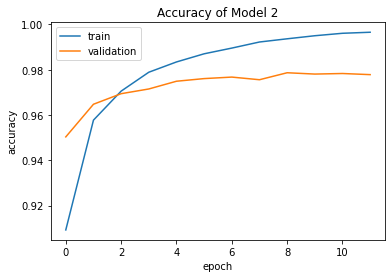

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


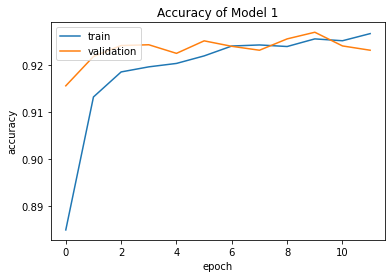

validation loss and accuracy of Model 1 [0.2851683497428894, 0.9205999970436096]
validation loss and accuracy of Model 2 [0.07324250787496567, 0.9812999963760376]


In [47]:
# Answer Question 8
print(history2.history.keys())

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy of Model 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### to compare the two plots

# Answer Question 3
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model 1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

accuracy_loss = model.evaluate(x_test, y_test, verbose=0)
print("validation loss and accuracy of Model 1", accuracy_loss)

accuracy_loss_2 = model2.evaluate(x_test, y_test, verbose=0)
print("validation loss and accuracy of Model 2", accuracy_loss_2)

###Question 9:
Discuss with your group, then describe to your teacher, how this training history
differs from the previous model, for the training and validation sets. 
Describe what this tells us about the generalisation of the model.

Answer 9: The non-linear model 2 performs significantly better than the first model. 
The validation loss from Model 1 (0.2844) decreases significantly (0.0847) and the model accuracy increases by almost 5%. Still there was quite the gap between the validation and the training data, showing that both models even though they were imporved, may not be well suited for a general use. OVERFITTING

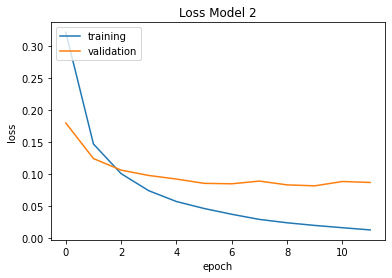

In [48]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss Model 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()